# PROGRAMMING FOR DATA ANALYSIS
##  Project 2018
### DATE DUE ON/BEFORE 14 DEC 2018

Problem statement

It is requested to investigate any relationship between the touchdown distance of the aircraft known as the X-15 and the following parameters, Indicated airspeed, groundspeed and Distance to touchdown at 1 mile to landing.

It is envisaged that as a result of energy in the aircraft, that the landing distance will vary.
Energy in the aircraft will be proportional to the Vertical velocity, Airspeed and Groundspeed and in turn the energy in the aircraft needs to be 'depeleted sufficiently' to allow the aircraft to land.
The measurement of this is the distance used during the slideout (usually known as rollout on wheels)

Data is supplied in the document 'STATISTICAL ANALYSIS OF LANDING CONTACT CONDITIONS OF THE X-15 AIRPLANE' at the URL https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19670005606.pdf 

## Reason for very late start.
Delayed start to project:  
Mostly work related - project work and frustration with certain internal processes.  
My head was not in any shape to do any study after work.  
Also not knowing what to pick as a subject that would not be work related and breach confidentiality at all and personal/work-related reasons.  
The Datasets that I would be used to which would be interesting to investigate would not be allowed to be put up on GITHUB for anyone to download - even if the datasets were 'shifted/translated' along the X-axis or scaled up/down the Y-axis.  
It was a long time before I found this PDF file on the NASA Technical website which provided sufficient data to create suitable datasets.  


The following parameters are known to be related to the Slideout(rollout) distance.
Vertical velocity (
Indicated Airspeed at Landing
True Groundspeed at Landing


It has been found from landing data that the parameters are   
Page 4 : Vertical Velocity = Average 2 ft/sec, Poisson, Min 1, Max 8 ft/sec  ( 480 ft/min )  
Page 5 : Indicated Airspeed = 190 knots Normal bell-curve, Min 150, Max 230, SD = 13 knots.  
Page 6 : True Groundspeed = Centered on 200 knots Normal bell-curve, Min 160, Max 240, SD = 13 knots.  
and  
Page 10: Slideout (Rollout) distance  =  Centered on 6000 feet Normal, Min 3000, max 9000, SD = 1000 feet  



In [102]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

# ref #1
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# import functionality for computing some statistics
import statistics 

# Setup the data arrays/lists
# VerticalSpeed is usually known as VerticalSpeed nowadays - the name VSI for the indicator
VerticalVelocity = []
# Inidcated Airspeed = speed through the air
IndicAirspeed    = []
# True groundspeed = speed over the ground
Truegroundspeed  = []
# Slideout Distance = the distance used on the ground after landing to eventually come to a stop
SlideoutDistance = []
# Slideout Distance = the distance used on the ground in multiples of 1000 feet
SlideoutDist1000 = []
# The datset of an amalgaated dataset of the previous datasets
Overall = []
# a temp dataset
tmpset = []

# filenames for storing the data created by this jupyter notebook
filnam_realdata  = "c:\data\proj2018-dataactual.csv"
filnam_normdata  = "c:\data\proj2018-datanormalised.csv"
filnam_shiftdata = "c:\data\proj2018-datashifted.csv"

# text idenitification of the columns in the created cdv files
cols_titles = "VerticalVelocity,IndicatedAirspeed,TrueGroundspeed,SlideoutDistance,SlideoutDist1000"

n = 200             # size of the dataset  ( n = sample_size )
x = 0               # temp variable
dec_digits = 1000   # used to redcue the number of decimal places


###################################################################################################

# Start to create data - slightly long winded but need to find the average and std_deviation for later on.

# Populate the VerticalVelocity data list
# ref #3
averg = 2
tmpset = np.random.poisson(averg, n)
VVavg = tmpset.mean()
VVstd = tmpset.std()
VerticalVelocity = tmpset

# setup the Indicated airspeed dataset
# ref #4
center = 190
sd = 13
tmpset = np.random.normal(center, sd, n)
IASavg = tmpset.mean()
IASstd = tmpset.std()
IndicAirspeed = tmpset

# setup the TrueGroundSpeed dataset
center = 200
sd = 13
tmpset = np.random.normal(center, sd, n)
TGSavg = tmpset.mean()
TGSstd = tmpset.std()
TrueGroundspeed = tmpset

# setup the SlideoutDistance dataset
center = 6000
sd = 1000
tmpset = np.random.normal(center, sd, n)
SODavg = tmpset.mean()
SODstd = tmpset.std()
SlideoutDistance = tmpset
##############################################################################################


# round the SlideoutDistance down to the nearest 1000 to be used for categories (like the IRIS species)
SlideoutDist1000.clear()
for x in range(n):
#    SlideoutDist1000.append( 1000* (int(SlideoutDistance[x] / 1000)))
    SlideoutDist1000.append(  (int(SlideoutDistance[x] / 1000)))
        
# round off each list to 'x' decimal places        
for x in range(n):
    VerticalVelocity[x] = int( dec_digits * VerticalVelocity[x] ) / dec_digits
    IndicAirspeed[x]    = int( dec_digits * IndicAirspeed[x]    ) / dec_digits
    TrueGroundspeed[x]  = int( dec_digits * TrueGroundspeed[x]  ) / dec_digits
    SlideoutDistance[x] = int( dec_digits * SlideoutDistance[x] ) / dec_digits

        
# save overall Dataset to file
# ref #5 + #6
# open an output file for saving the datset line by line - thereby making a 'normal' CSV file'
file = open(filnam_realdata,'w') 
file.write(cols_titles+"\n")
# now to generate a single dataset with each element of the three input giving a simulated output the slideout distance
Overall.clear()
for x in range(n):
    tmp5 = str(VerticalVelocity[x])+","+str(IndicAirspeed[x])    +","+str(TrueGroundspeed[x])+","+str(SlideoutDistance[x])+","+str(SlideoutDist1000[x])
    Overall.append( tmp5 )
    file.write(tmp5+"\n")
# close the file.
file.close()


######################################################################################################
# shift the data for each parameter towards the mean
tmpset = VerticalVelocity
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x] - VVavg)         ) / dec_digits
VerticalVelocity = tmpset

# shift the list towards the mean
tmpset = IndicAirspeed
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x] - IASavg)         ) / dec_digits
IndicAirspeed = tmpset

# shift the list towards the mean
tmpset = TrueGroundspeed
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x] - TGSavg)         ) / dec_digits
TrueGroundspeed = tmpset

# shift the list towards the mean
tmpset = SlideoutDistance
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x] - SODavg)         ) / dec_digits
SlideoutDistance = tmpset

# We do not scale the list  SlideoutDist1000 as this is the 'key' or the 'species' (iris dataset)

# save overall Dataset to file
# ref #5 + #6
# open an output file for saving the datset line by line - thereby making a 'normal' CSV file'
file = open(filnam_shiftdata,'w') 
file.write(cols_titles+"\n")
# now to generate a new single dataset with each element of the three input giving a simulated output the slideout distance
Overall.clear()
for x in range(n):
    tmp5 = str(VerticalVelocity[x])+","+str(IndicAirspeed[x])    +","+str(TrueGroundspeed[x])+","+str(SlideoutDistance[x])+","+str(SlideoutDist1000[x])
    Overall.append( tmp5 )
    file.write(tmp5+"\n")
# close the output file
file.close()

##############################################################################################################

### Complete the Normalize of the data which has already been shifted towards the 'average'
tmpset = VerticalVelocity
stddev = tmpset.std()
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x]      )/ VVstd) / dec_digits
VerticalVelocity = tmpset

# shift the list towards the mean
tmpset = IndicAirspeed
stddev = tmpset.std()
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x]      )/ IASstd) / dec_digits
IndicAirspeed = tmpset

# shift the list towards the mean
tmpset = TrueGroundspeed
stddev = tmpset.std()
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x]      )/ TGSstd) / dec_digits
TrueGroundspeed = tmpset

# shift the list towards the mean
tmpset = SlideoutDistance
stddev = tmpset.std()
for x in range(n):
    tmpset[x] = int( dec_digits *(tmpset[x]      )/ SODstd) / dec_digits
SlideoutDistance = tmpset

# We do not scale the list  SlideoutDist1000 as this is the 'key' or the 'species' (iris dataset)


# save overall Dataset to file
# ref #5 + #6
# open an output file for saving the datset line by line - thereby making a 'normal' CSV file'
file = open(filnam_normdata,'w') 
file.write(cols_titles+"\n")
# now to generate a new single dataset with each element of the three input giving a simulated output the slideout distance
Overall.clear()
for x in range(n):
    tmp5 = str(VerticalVelocity[x])+","+str(IndicAirspeed[x])    +","+str(TrueGroundspeed[x])+","+str(SlideoutDistance[x])+","+str(SlideoutDist1000[x])
    Overall.append( tmp5 )
    file.write(tmp5+"\n")
# close the output file
file.close()
###############################################################################################################


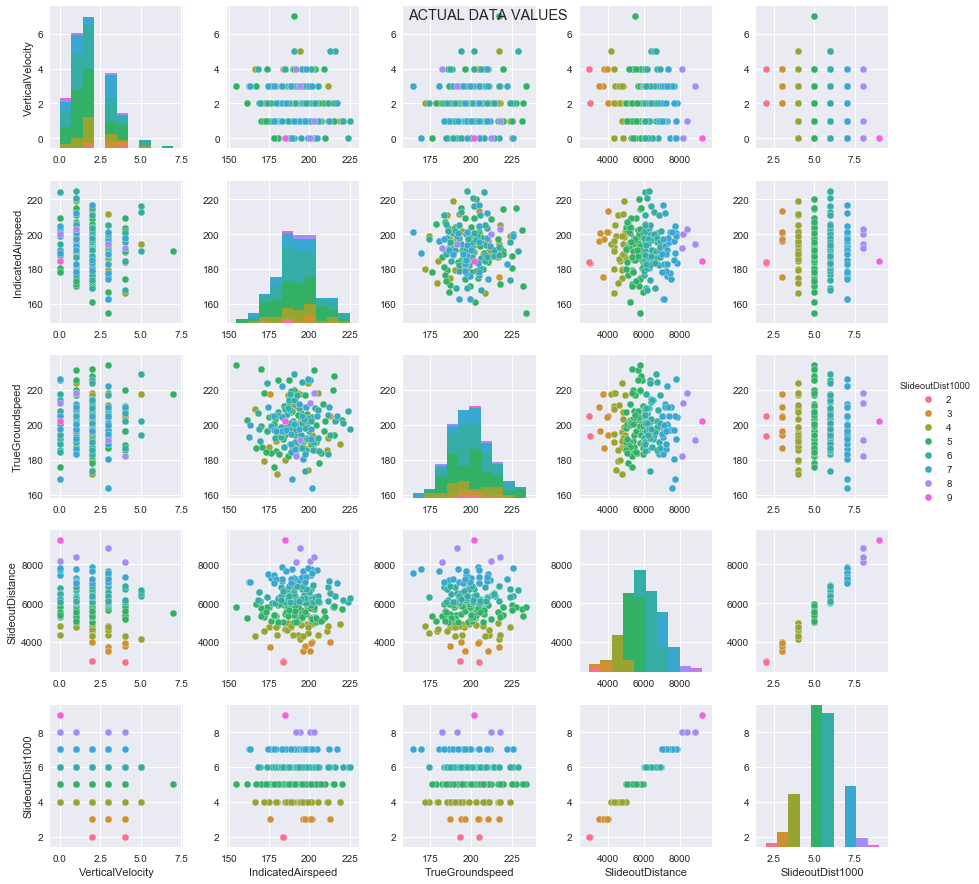

In [103]:

# ref #1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(filnam_realdata)
# use  SlideoutDist1000 to 'layer' the data into  layers of multiples of 1000 feet distances
sns.pairplot(df, hue='SlideoutDist1000')
plt.suptitle("ACTUAL DATA VALUES")       # ref #9
plt.show()


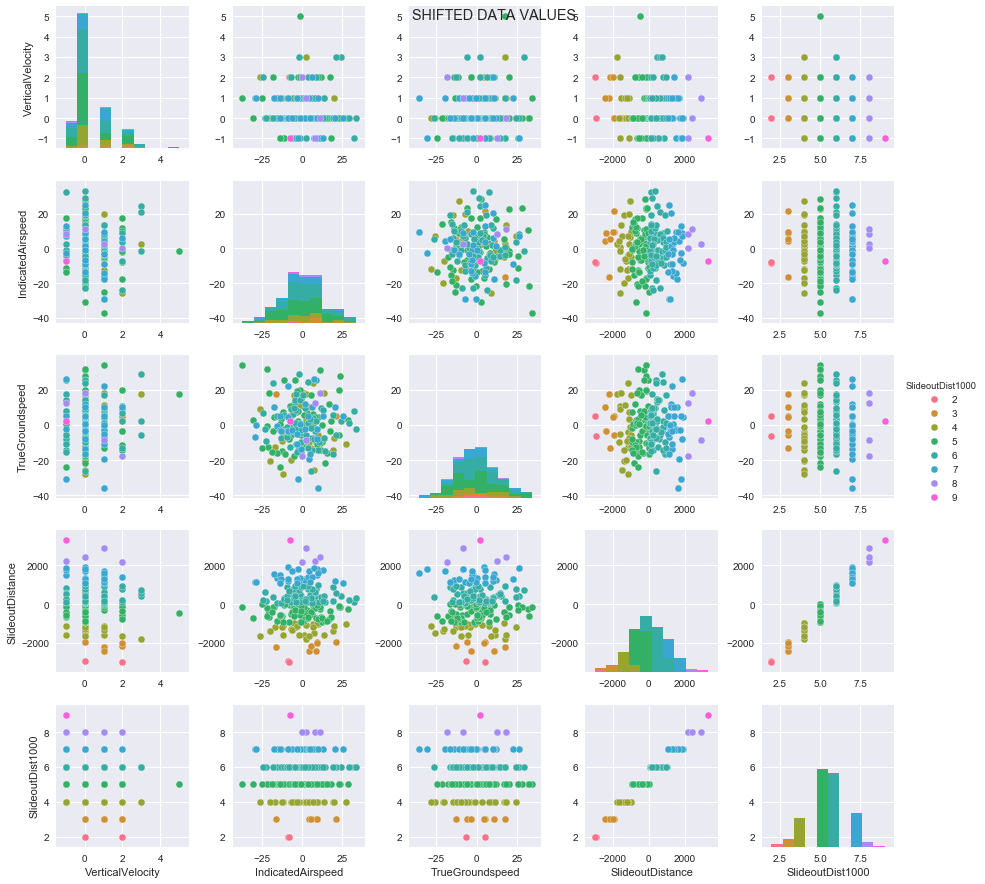

In [104]:
# ref #1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(filnam_shifteddata)
# use  SlideoutDist1000 to 'layer' the data into  layers of multiples of 1000 feet distances
sns.pairplot(df, hue='SlideoutDist1000')
plt.suptitle("SHIFTED DATA VALUES")       # ref #9
plt.show()


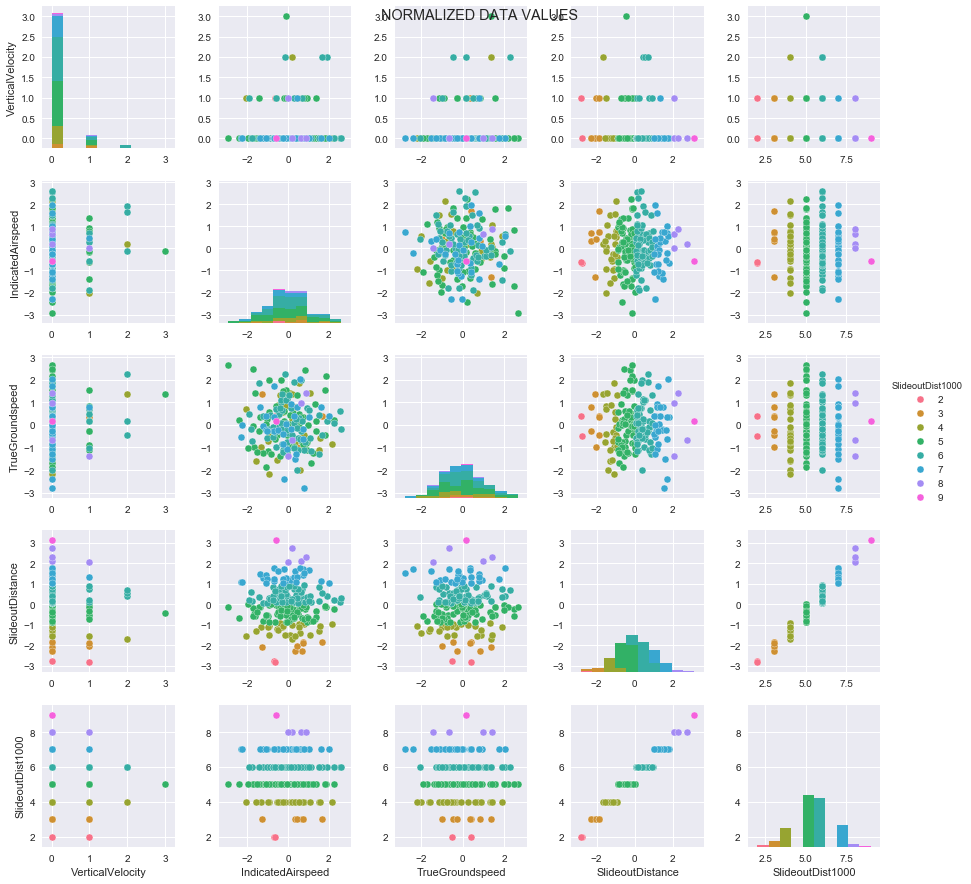

In [105]:
# ref #1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(filnam_normdata)
# use  SlideoutDist1000 to 'layer' the data into  layers of multiples of 1000 feet distances
sns.pairplot(df, hue='SlideoutDist1000')
plt.suptitle("NORMALIZED DATA VALUES")       # ref #9
plt.show()

References: 
#1, https://www.tutorialspoint.com/python/python_poisson_distribution.htm visited: 20181212

#2, https://stackoverflow.com/questions/24452594/fitting-a-poisson-distribution-to-data-in-statsmodels visited: 20181212

#3, https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html visited: 20181212

#4, https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal visited: 20181212

#5, https://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file  visited: 2081213

#6, https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python  visisted: 2081213

#7, https://stackoverflow.com/questions/16579407/are-there-any-example-data-sets-for-python  visisted: 20181213

#8, https://seaborn.pydata.org/introduction.html  visited: 20181213

#9, https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot  visited: 20181213